In [23]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
import datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

sns.set()
# Dataset is gotten from https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city#

In [24]:
# Preparing data set
data = pd.read_csv("assets/Tetuan_City_power_consumption.csv") 
data.columns = data.columns.str.replace(' ','_')
data.DateTime = pd.to_datetime(data.DateTime)
data.set_index('DateTime', inplace=True)
# Zone 1
data_zone1 = data[['Zone_1_Power_Consumption']]
# Changing frequency to daily
data_zone1 = data_zone1.resample('D').sum()
df_rnn = data_zone1[['Zone_1_Power_Consumption']]

In [5]:
# Defining a variable which would be considered as n_input later
num = 7

#Spliting data to train and test

train_test_cutoff = -(num)
train_rnn = df_rnn.iloc[:train_test_cutoff] # Drop the last 'num' days of our data
test_rnn = df_rnn.iloc[train_test_cutoff:]

In [6]:
# Scale our data

scaler = MinMaxScaler()
scaler.fit(train_rnn) # Fit only to training
scaled_train = scaler.transform(train_rnn)
scaled_test = scaler.transform(test_rnn)

In [5]:
# Time Series Generator - Generates batches that retain their sequences 
# Batches of 7 Days + the resulting value for day 8

ts_generator = TimeseriesGenerator(scaled_train, scaled_train, length=num, batch_size=1)


#### We are using LSTM (Long Short-Term Memory) layer for our rnn model 

In [6]:
# RNN Architecture

n_features = 1
n_input = num

model_rnn = Sequential()

model_rnn.add(LSTM(units=170, return_sequences=True, activation='relu' , input_shape=(n_input, n_features)))
model_rnn.add(Dropout(0.1))

model_rnn.add(LSTM(units=160, return_sequences=True, activation='relu'))
model_rnn.add(Dropout(0.1))

model_rnn.add(LSTM(units=150, return_sequences=True, activation='relu'))
model_rnn.add(Dropout(0.1))

model_rnn.add(LSTM(units=140, return_sequences=True, activation='relu'))
model_rnn.add(Dropout(0.1))

model_rnn.add(LSTM(units=130, return_sequences=True, activation='relu'))
model_rnn.add(Dropout(0.1))

model_rnn.add(LSTM(units=120, activation='relu'))
model_rnn.add(Dropout(0.1))

model_rnn.add(Dense(units=1))

In [7]:
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 170)            116960    
                                                                 
 dropout (Dropout)           (None, 7, 170)            0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 160)            211840    
                                                                 
 dropout_1 (Dropout)         (None, 7, 160)            0         
                                                                 
 lstm_2 (LSTM)               (None, 7, 150)            186600    
                                                                 
 dropout_2 (Dropout)         (None, 7, 150)            0         
                                                                 
 lstm_3 (LSTM)               (None, 7, 140)            1

In [8]:
model_rnn.fit_generator(generator = ts_generator, epochs=220)

Epoch 1/220


<ipython-input-8-dc786dd11299>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_rnn.fit_generator(generator = ts_generator, epochs=220)


350/350 [==============================] - 10s 12ms/step - loss: 0.0575
Epoch 2/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0209
Epoch 3/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0210
Epoch 4/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0230
Epoch 5/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0184
Epoch 6/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0164
Epoch 7/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0179
Epoch 8/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0173
Epoch 9/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0155
Epoch 10/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0187
Epoch 11/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0176
Epoch 12/220
350/350 [==============================] - 4s 13ms/step - loss: 0.0157
Epoch 13/220

350/350 [==============================] - 4s 12ms/step - loss: 0.0068
Epoch 195/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0068
Epoch 196/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0062
Epoch 197/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0067
Epoch 198/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0082
Epoch 199/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0063
Epoch 200/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0063
Epoch 201/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0071
Epoch 202/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0066
Epoch 203/220
350/350 [==============================] - 4s 13ms/step - loss: 0.0068
Epoch 204/220
350/350 [==============================] - 4s 12ms/step - loss: 0.0069
Epoch 205/220
350/350 [==============================] - 4s 12ms/step - loss: 0

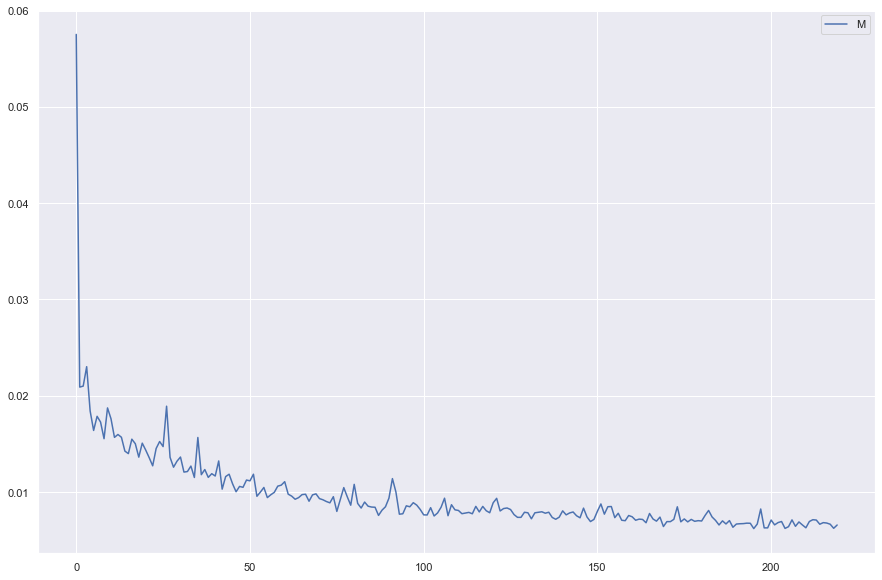

In [9]:
# loss plot of the model with 220 epochs
plt.figure(figsize=(15,10))
plt.plot(model_rnn.history.history['loss'])
plt.legend(labels='MSE')

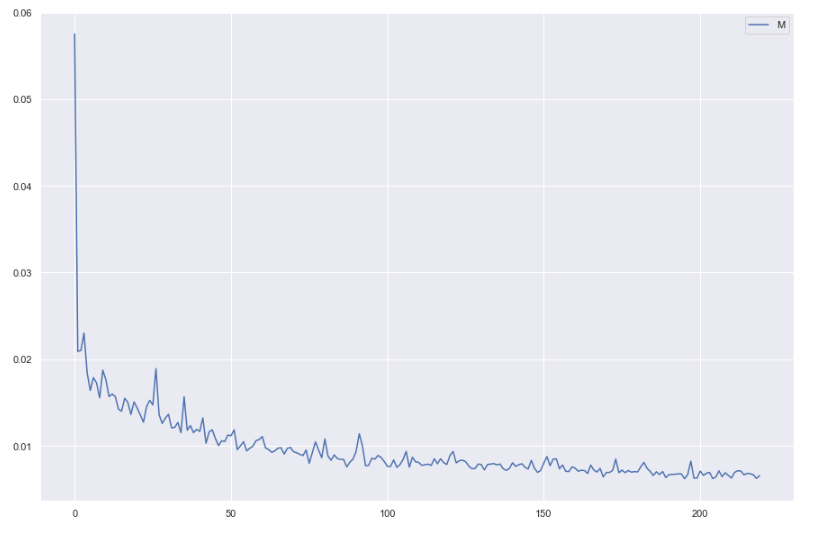

In [10]:
# # Save the model
# model_rnn.save('model_rnn_relu_rmse66.h5')

In [7]:
# Load a model with the best performance
model_rnn = load_model('models/model_rnn_relu_rmse66.h5')

In [8]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 170)            116960    
                                                                 
 dropout (Dropout)           (None, 7, 170)            0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 160)            211840    
                                                                 
 dropout_1 (Dropout)         (None, 7, 160)            0         
                                                                 
 lstm_2 (LSTM)               (None, 7, 150)            186600    
                                                                 
 dropout_2 (Dropout)         (None, 7, 150)            0         
                                                                 
 lstm_3 (LSTM)               (None, 7, 140)            1

In [9]:
# Prediction on test
rnn_predictions= []
current_data = scaled_train[-(num):].reshape((1, num,1))
for i in range(num):
    current_prediction = model_rnn.predict(current_data, verbose=0)[0]
    rnn_predictions.append(current_prediction)
    current_data= np.append(current_data[:,1:,:],[[current_prediction]],axis=1)    

In [10]:
# Comparing ground truth and prediction of test
inversed_preds = scaler.inverse_transform(rnn_predictions)
test_rnn.loc[:,('pred')] = inversed_preds
test_rnn

,Zone_1_Power_Consumption,pred
DateTime,,
2017-12-24,3.955291e+06,4.064724e+06
2017-12-25,4.317256e+06,4.246324e+06
2017-12-26,4.321941e+06,4.260015e+06
2017-12-27,4.315243e+06,4.303683e+06
2017-12-28,4.358449e+06,4.311354e+06
2017-12-29,4.206187e+06,4.132946e+06
2017-12-30,4.052976e+06,4.104035e+06


In [11]:
# Training root mean squared error 

test_mean = np.mean(test_rnn['Zone_1_Power_Consumption'])
test_rmse = np.sqrt(mean_squared_error(test_rnn['Zone_1_Power_Consumption'],test_rnn['pred']))
print(f"Test mean: {round(test_mean)}")
print(f"Test RMSE: {round(test_rmse)}\n")
print(f"Percentage of error to mean less than {100*round(test_rmse/test_mean,3)} %")

Test mean: 4218192
Test RMSE: 66724

Percentage of error to mean less than 1.6 %


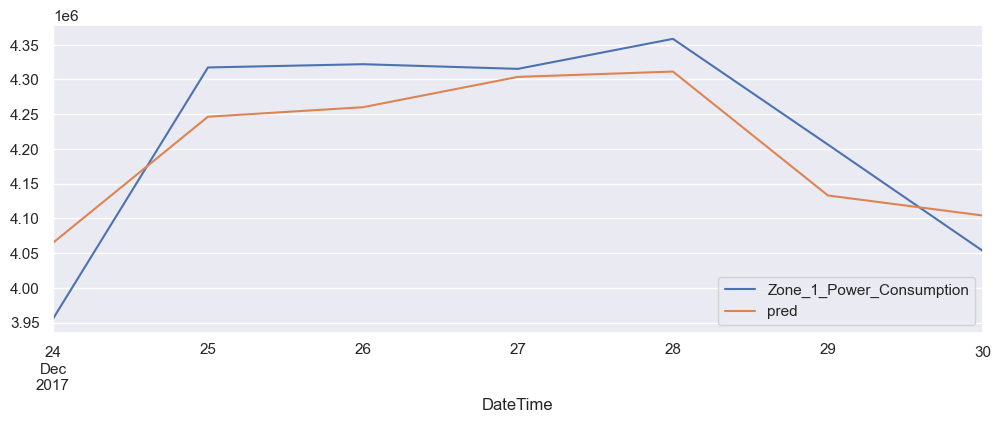

In [12]:
# Visualize our predicted and our test values 

test_rnn.plot(figsize=(12,4));

In [13]:
# future predictions

future_preds = []
current_data = scaled_test.reshape((1, num, 1)) 
for i in range(num): 
    
    # This is our prediction for 1 timestep into the future
    current_prediction = model_rnn.predict(current_data, verbose=0)[0]
    
    # Append it to our list of prediction
    future_preds.append(current_prediction)
    
    # Update current_data. Shift the data over by 1 and append the prediction 1 timestep into the future
    current_data = np.append(current_data[:,1:,:],[[current_prediction]],axis=1)

In [14]:
# Inverse the scaling of our predictions

inv_future_preds = np.round(scaler.inverse_transform(future_preds)).reshape(num).astype(int)

In [15]:
# Add out forecasted passengers to a df with a datetime index

start=pd.Timestamp('12-31-2017')
future_df = pd.DataFrame(inv_future_preds,index=pd.date_range(start=start,end=start+pd.Timedelta(days=num-1), freq='D'),columns=['forecast'])
future_df

,forecast
2017-12-31,4055672
2018-01-01,4155768
2018-01-02,4253884
2018-01-03,4292580
2018-01-04,4292479
2018-01-05,4140402
2018-01-06,4088257


In [16]:
# # Saving fyture prediction for deployment
# future_df.to_pickle('models/rnn_predictions.pkl')

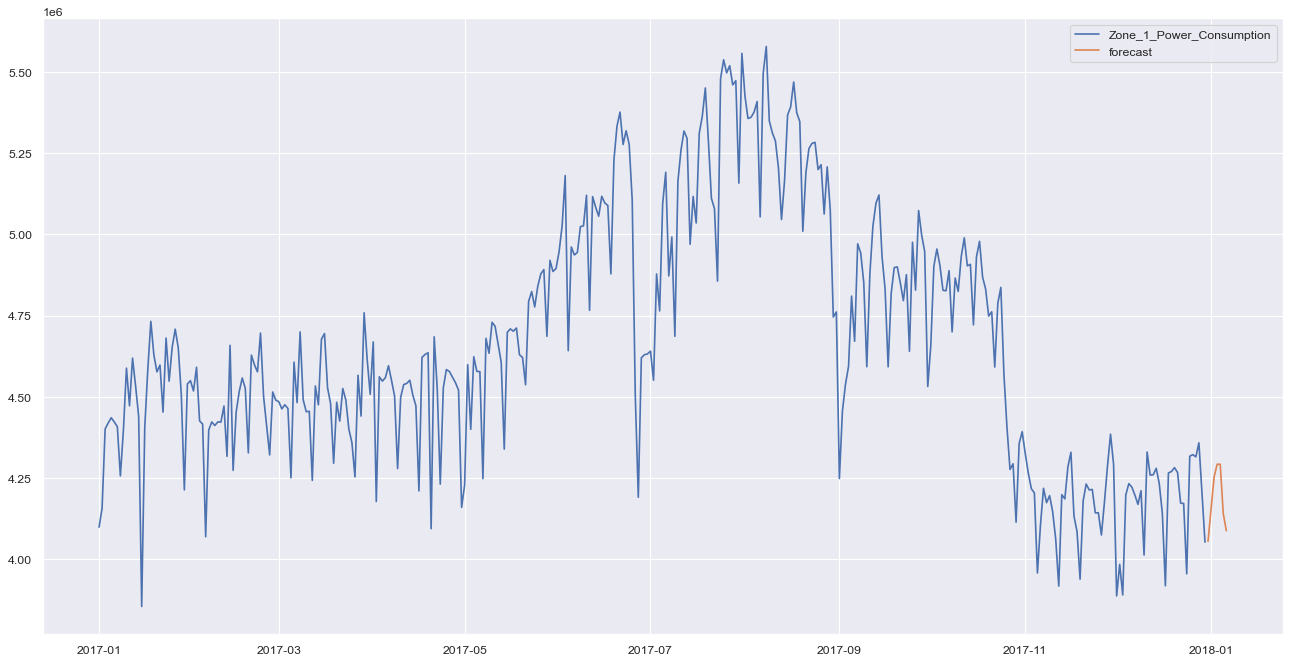

In [21]:
# Plot our forecased energy consumptipon for the next days

figure(figsize=(20, 10), dpi=80)
ax = plt.plot(df_rnn['Zone_1_Power_Consumption']), plt.plot(future_df)
plt.legend(labels=['Zone_1_Power_Consumption','forecast']);